<a href="https://colab.research.google.com/github/thuyagu1995/Adactinfirst/blob/master/Copy_of_data_cleaning_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/auto-mpg.csv')

In [ ]:
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [ ]:
data['horsepower'] = pd.to_numeric(data['horsepower'],errors = 'coerce').astype(float)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
None


In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Cleaning Null Values

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Finding Outliers

In [ ]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# **Comparing the Inter Quantile Range hear 1.5IQR value does not go beyond the max value and the min Value.hence we see there are No outliers Present in this Data**

In [ ]:
data.drop_duplicates

<bound method DataFrame.drop_duplicates of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  
2            70       1         plymouth satellite  
3            70       1              amc rebel sst  
4            70       1                ford torino  
..          ...     ...                        ...  
393          82       1            ford mustang gl  
394          82       2                  vw pickup  
395          82       1              dodge rampage  
396          82       1                ford ranger  
397          82       1                 chevy s-10  

[392 rows x 9 columns]>

In [ ]:
change_colun_pos = data.pop('mpg')

In [ ]:
data.insert(8,'mpg',change_colun_pos)
data.drop(columns=['car name'],inplace= True)
data

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,8,307.0,130.0,3504,12.0,70,1,18.0
1,8,350.0,165.0,3693,11.5,70,1,15.0
2,8,318.0,150.0,3436,11.0,70,1,18.0
3,8,304.0,150.0,3433,12.0,70,1,16.0
4,8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,27.0
394,4,97.0,52.0,2130,24.6,82,2,44.0
395,4,135.0,84.0,2295,11.6,82,1,32.0
396,4,120.0,79.0,2625,18.6,82,1,28.0


**EDA**

# Visualization

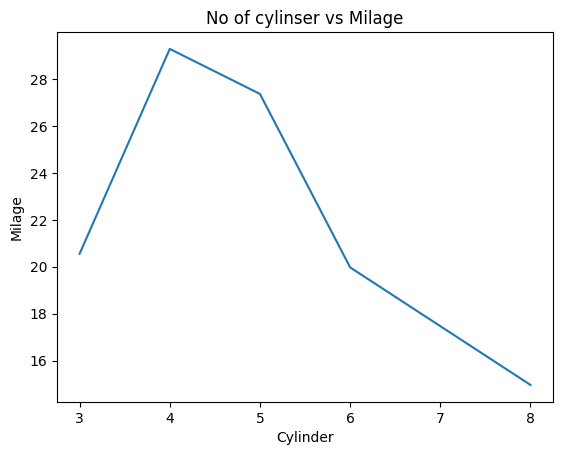

In [ ]:
data.groupby('cylinders')['mpg'].mean().plot()
#data.plot(x= 'cylinders',y = 'mpg',style = 'o')
plt.title('No of cylinser vs Milage')
plt.xlabel('Cylinder')
plt.ylabel('Milage')
plt.show()

**From the graph we can see a negative linear relation ship between No of Cylinder and milage**

In [ ]:
corrdata = data[['mpg','cylinders']].corr()
print(corrdata)

                mpg  cylinders
mpg        1.000000  -0.777618
cylinders -0.777618   1.000000


And from the correlation values we can confirm that No of cylinder has a strong linear relation ship with milage

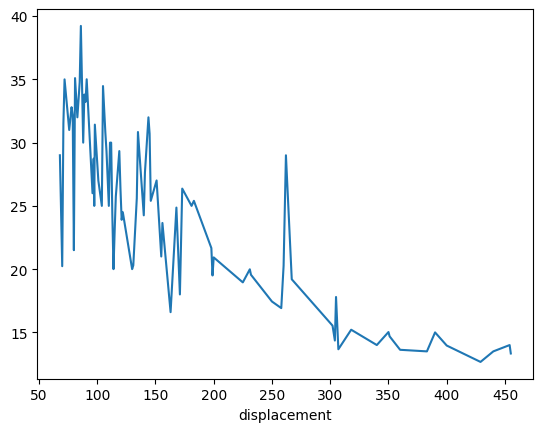

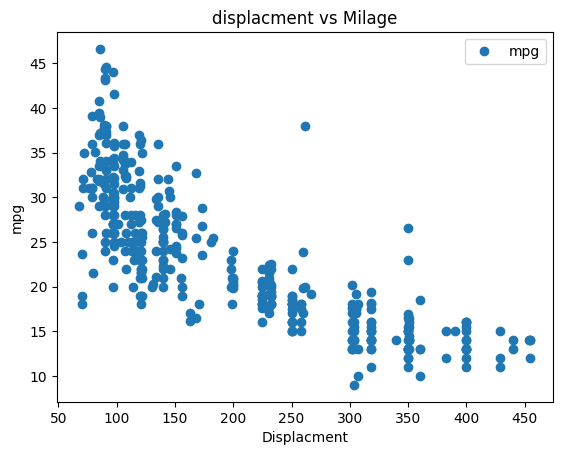

In [ ]:
data.groupby('displacement')['mpg'].mean().plot()
data.plot(x = 'displacement',y = 'mpg',style='o')
plt.title('displacment vs Milage')
plt.xlabel('Displacment')
plt.ylabel('mpg')
plt.show()

In [ ]:
corrdata = data[['mpg','displacement']].corr()
print(corrdata)

                   mpg  displacement
mpg           1.000000     -0.805127
displacement -0.805127      1.000000


From the graph we can see a negative linear relation ship between Displacement and milage
And from the correlation values we can confirm that Displacement has a strong linear relation ship with milage


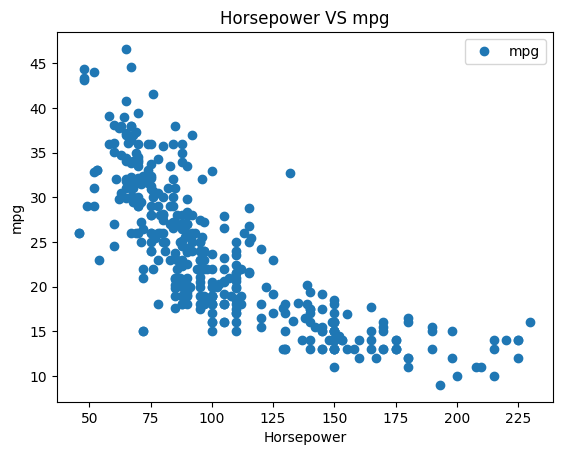

In [ ]:
#data.groupby('horsepower')['mpg'].mean().plot()
data.plot(x='horsepower',y='mpg',style='o')
plt.title('Horsepower VS mpg')
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.show()

In [ ]:
corrdata = data[['mpg','horsepower']].corr()
print(corrdata)

                 mpg  horsepower
mpg         1.000000   -0.778427
horsepower -0.778427    1.000000


From the graph we can see a negative linear relation ship between Horsepower and milage
And from the correlation values we can confirm that Horsepower has a strong linear relation ship with milage

Text(0, 0.5, 'mpg')

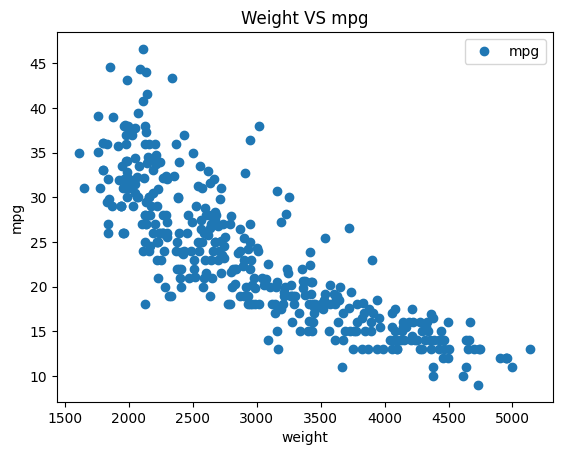

In [ ]:
#data.groupby('weight')['mpg'].mean().plot()
data.plot(x='weight',y='mpg',style='o')
plt.title('Weight VS mpg')
plt.xlabel('weight')
plt.ylabel('mpg')

In [ ]:
corrdata = data[['mpg','weight']].corr()
print(corrdata)

             mpg    weight
mpg     1.000000 -0.832244
weight -0.832244  1.000000


From the graph we can see a negative linear relation ship between weight and milage
And from the correlation values we can confirm that weight has a strong linear relation ship with milage

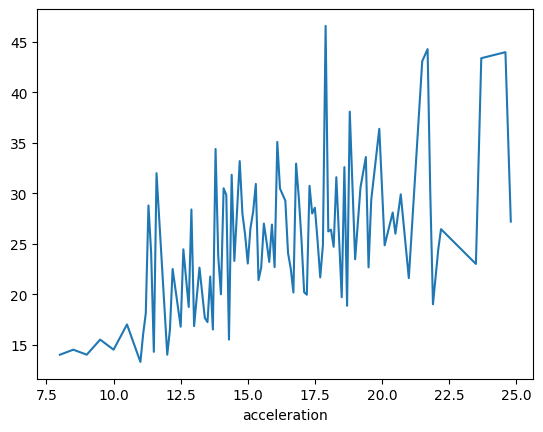

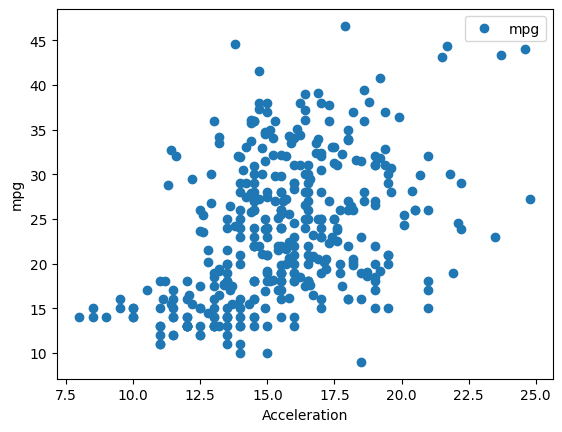

In [ ]:
data.groupby('acceleration')['mpg'].mean().plot()
data.plot(x='acceleration',y='mpg',style='o')
plt.xlabel('Acceleration')
plt.ylabel('mpg')
plt.show()

In [ ]:
corrdata = data[['mpg','acceleration']].corr()
print(corrdata)

                   mpg  acceleration
mpg           1.000000      0.423329
acceleration  0.423329      1.000000


From the graph we can see a positive linear relation ship between Acceleration and milage
And from the correlation values we can confirm that Displacement has a strong linear relation ship with milage

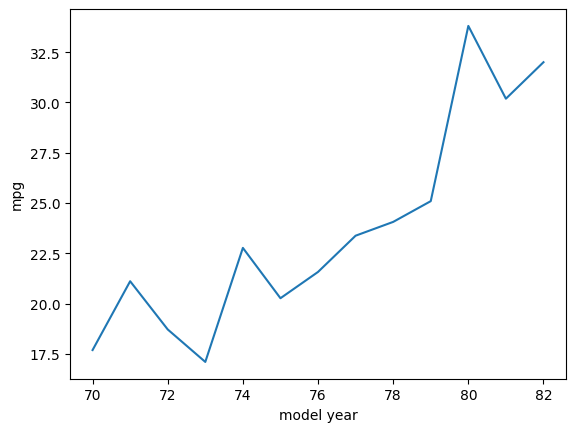

In [ ]:
data.groupby('model year')['mpg'].mean().plot()
#data.plot(x='model year',y='mpg',style='o')
plt.xlabel('model year')
plt.ylabel('mpg')
plt.show()

In [ ]:
corrdata = data[['mpg','model year']].corr()
print(corrdata)

                 mpg  model year
mpg         1.000000    0.580541
model year  0.580541    1.000000


# From the graph we can see a positive linear relation ship between Model Year and milage
# And from the correlation values we can confirm that Model Year has a strong linear relation ship with milage

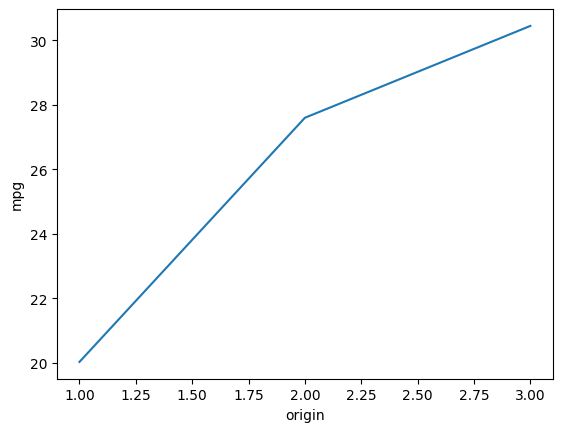

In [ ]:
data.groupby('origin')['mpg'].mean().plot()
#data.plot(x='origin',y='mpg',style='o')
plt.xlabel('origin')
plt.ylabel('mpg')
plt.show()

In [ ]:
corrdata = data[['mpg','origin']].corr()
print(corrdata)

             mpg    origin
mpg     1.000000  0.565209
origin  0.565209  1.000000


# From the graph we can see a positive linear relation ship between Origin and milage
# And from the correlation values we can confirm that origin has a strong linear relation ship with milage


In [ ]:
X = data[['cylinders','displacement','horsepower','weight','acceleration','model year','origin']]
y = data[['mpg']]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [ ]:
scaler = StandardScaler()#initalize
scaler.fit(X_train,y_train)#Fit
X_train_scaled = scaler.transform(X_train)#Transform
X_test_scaled = scaler.transform(X_test)

#**Model Traning**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_.T,['cylinders','displacement','horsepower','weight','acceleration','model year','origin'],columns=['Coefficent'])
print(coeff_df)

              Coefficent
cylinders      -0.658733
displacement    1.796544
horsepower     -0.388706
weight         -5.700426
acceleration    0.393178
model year      2.709298
origin          0.915356


Compare the Abosulete value of coefficent of all features and we can determine the important features

In [ ]:
regressor.intercept_ # value of C

array([23.48242812])

# **Prediction for y**

In [ ]:
y_pred = regressor.predict(X_test_scaled)

In [ ]:
print(y_test.shape)
y_test=y_test.to_numpy().flatten()

(79, 1)


In [ ]:
print(y_pred.shape)
y_pred = y_pred.flatten()

(79, 1)


In [ ]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,28.0,25.959768
1,22.3,25.607885
2,12.0,10.612252
3,38.0,32.303522
4,33.8,33.227660
...,...,...
74,23.0,21.039743
75,14.0,12.850526
76,26.0,25.806747
77,19.2,21.385621


# **Metrics**

In [ ]:
r2_Score = metrics.r2_score(y_test,y_pred)
print(r2_Score)

0.8363664681024058
